Note: This work is carried out using a dataset which is Customer Personality Analysis from kaggle. The main purpose of this project is to apply supervised machine learning methods to predict the Response feature. 

The dataset used in this project is : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download

Done By: Manish Shrestha(NP03A190049/ 2050092) [L6CG1]

In [ ]:
# Importing requried library for the entire notebooks, for which we can handel data as well as helps us to visualizing data.

# Data Handling
import numpy as np
import pandas as pd

#For visualizing part
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Now for prediciton as transformations
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

# New Section

Mounting the drive with google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the requried dataset

In [ ]:
#Importing the data and stored inside path variables
path = '/content/drive/MyDrive/marketing_campaign.csv'

In [ ]:
df = pd.read_csv(path, sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()
# Observation -> here, total 2240 samples and 29 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Data Cleaning

# Here we can see the following two columns 'Z_CostContact' and 'Z_Revenue' which haven't been described by the data.
# Dropping columns beacuse they will not contribute anything in model building.

#For dropping the colums ===> this is the code ::

df = df.drop(['Z_CostContact', 'Z_Revenue'],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
#In an attempt to be methodical, I rearranged the features in order to present them as they appear in the Meta-Data Table.

n_df = df[['ID','Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
    'AcceptedCmp5','Complain','Dt_Customer','Education','Marital_Status',
    'Kidhome','Teenhome','Income','MntFishProducts','MntMeatProducts',
    'MntFruits','MntSweetProducts','MntWines','MntGoldProds',
    'NumDealsPurchases','NumCatalogPurchases','NumStorePurchases',
    'NumWebPurchases','NumWebVisitsMonth','Recency']]

In [ ]:
#Checking null Values in dataset

#Obersvation -> data['Income'] have 24 null values

n_df.isna().sum(axis=0)

ID                      0
Response                0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Complain                0
Dt_Customer             0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Income                 24
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntSweetProducts        0
MntWines                0
MntGoldProds            0
NumDealsPurchases       0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebPurchases         0
NumWebVisitsMonth       0
Recency                 0
dtype: int64

In the Income column, there are only 24 Nan values. I've replaced them with the feature's median value in the following. I did it this way to prevent dropping registers, but I'm sure there are better ways to accomplish it. In this column, I also noted the existence of outliers. I made the same substitution.

In [ ]:
median = n_df['Income'].median()
n_df = n_df.fillna(median)

In [ ]:
std = n_df['Income'].std()
outliers = (df['Income'] - median).abs() > 3*std
#n_df.Income.replace(to_replace = outliers,value = median,inplace=True)
n_df.loc[outliers,'Income'] = median

I realized that Dt Customer is in date format, therefore I fixed it in the line below. I also changed the date to a numeric value, with 0 being the oldest date in the dataset and the numeric value assigned to each occurrence representing the number of days following that. So, assuming the dataset's maximum date is the present (which it isn't, because the maximum date is 2014, and I'm doing this in 2022. Dt Customer will represent the number of days since the customer subscribed to the platform.

In [ ]:
n_df['Dt_Customer'] = pd.to_datetime(n_df['Dt_Customer'])
mindate=n_df['Dt_Customer'].min()
n_df['Dt_Customer'] = (n_df['Dt_Customer']-mindate).dt.days

I discovered that Marital Status contained registers that were illogical. I swapped them out for Single.

In [ ]:
#Marital_Status outliers
n_df.Marital_Status.replace({'Alone':'Single','Absurd':'Single','YOLO':'Single'},inplace=True)

# Now analyzing Exploratory

In [ ]:
n_df.columns

Index(['ID', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Dt_Customer', 'Education',
       'Marital_Status', 'Kidhome', 'Teenhome', 'Income', 'MntFishProducts',
       'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines',
       'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency'],
      dtype='object')

First and foremost, I needed to see if the number of ones in the AcceptedCmpX and Response columns were the same. After reading the directions, I concluded that this should retain water.

In [ ]:
n_df.groupby(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']).agg({'Response':['count','sum']})

Response     
                                                                    count  sum
AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5              
0            0            0            0            0                1777  146
                                                    1                  59   21
                                       1            0                  84   11
                                                    1                  24   12
                          1            0            0                 129   55
                                                    1                   6    2
             1            0            0            0                   1    1
                                       1            0                   8    3
                                                    1                   4    2
                          1            0            0                   2    0
                                                    1                   2    2
1            0            0            0            0                  52   13
                                                    1                  21   14
                                       1            0                  14    6
                                                    1                  23   19
                          1            0            0                   8    5
                                                    1                  13   10
             1            0            1            0                   2    2
                                                    1                   8    7
                          1            0            1                   3    3

Surprisingly, 146 customers out of 1777 who had never accepted a single offer in prior campaigns accepted the offer in the most recent campaign. We also have clients who have accepted various offers (Cmp1 and Cmp5, Cmp1 and Cmp4, Cmp1 and Cmp3, Cmp1 and Cmp2 and Cmp4, Cmp1 and Cmp3 and Cmp5), with some of them declining the final offer.

In [ ]:
n_df.groupby(['Complain']).agg({'Complain':'count'})

,Complain
Complain,
0,2219
1,21


Because less than 1% of customers complained, the Complain column does not appear to be very useful.

I plotted the histograms below for the other characteristics. This gives for a better understanding of the data distribution inside each feature.

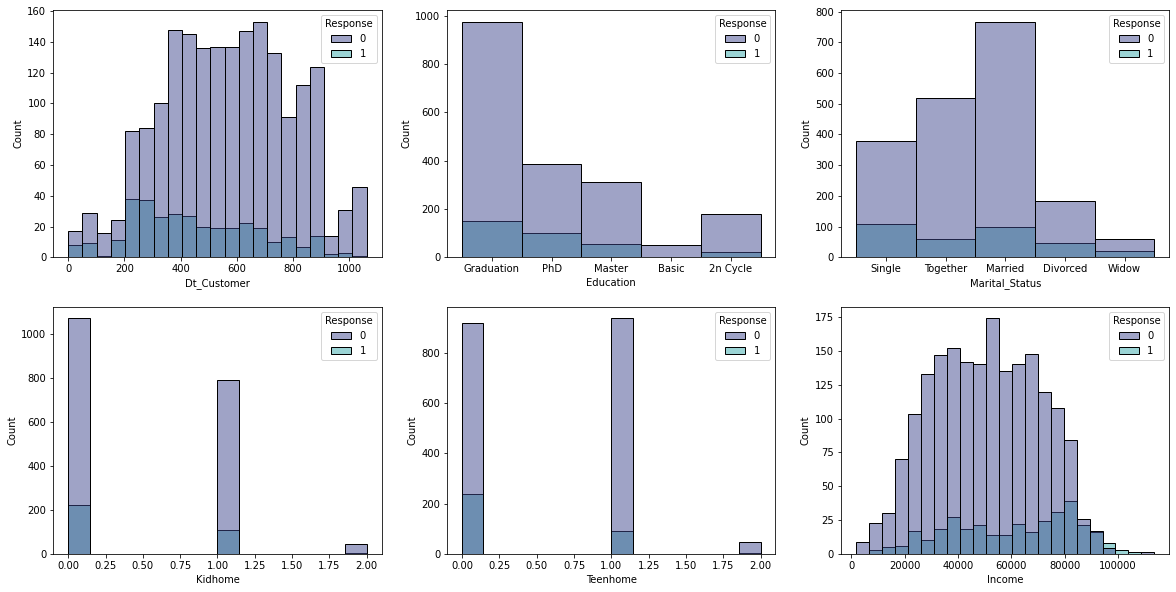

In [ ]:
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
cols = n_df.columns
a = 0

for i in cols[8:14]:
  sns.histplot(data = n_df, x = i, hue = 'Response', ax = axes[a],palette = 'mako')
  a= a+1 

The enrollment date is the first histogram. It can be seen that it stayed nearly constant. Over time, the firm was able to attract the same number of customers. Customers who had already subscribed were more likely to accept the final offer.The last histogram, which depicts the dataset's revenue profile, also contains useful information. It appears that the more the money, the greater the likelihood of acquiring the item.

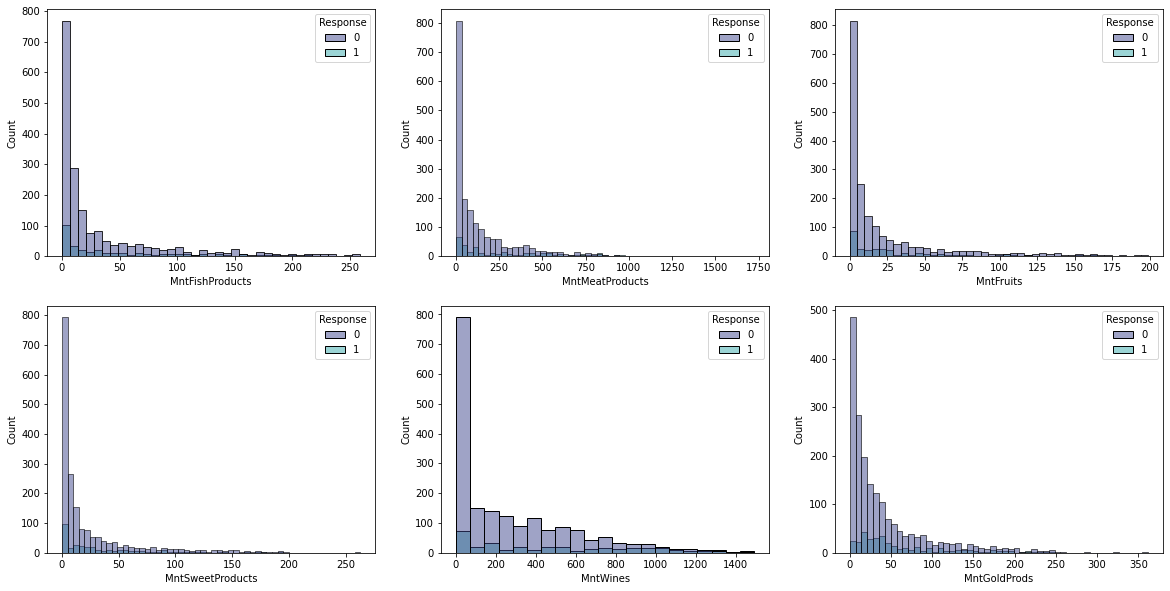

In [ ]:
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6)
axes = [ax1,ax2,ax3,ax4,ax5,ax6];a = 0

for i in cols[14:20]:
  sns.histplot(data = n_df, x = i, hue = 'Response', ax = axes[a],palette = 'mako')
  a= a+1

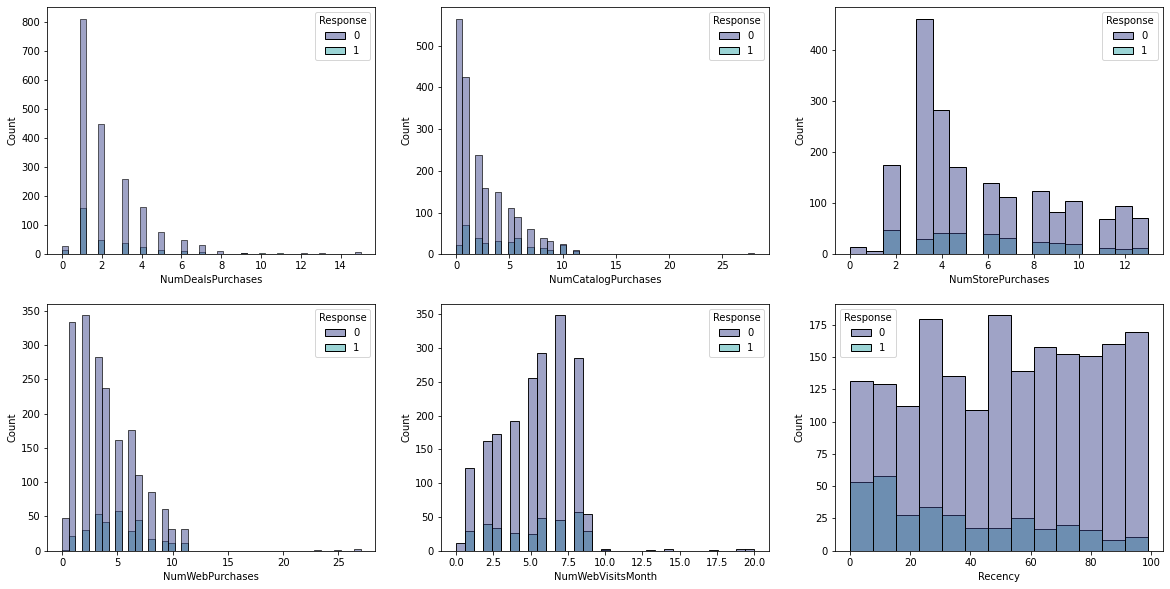

In [ ]:
plt.figure(figsize=(20, 10));ax1 = plt.subplot(2,3,1);ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3);ax4 = plt.subplot(2,3,4);ax5 = plt.subplot(2,3,5);
ax6 = plt.subplot(2,3,6);
axes = [ax1,ax2,ax3,ax4,ax5,ax6];a = 0

for i in cols[20:]:
  sns.histplot(data = n_df, x = i, hue = 'Response', ax = axes[a],palette = 'mako')
  a= a+1

Recency appears to have a relationship with the feature Response in this set of histograms. When clients' Recency was low, they bought more than when it was high.

Marital Status and Education are categorical characteristics that must be numerically translated in some way. To accomplish so, I utilized the OneHotEncoder. OneHotEncoding converts categorical data into columns containing only zeros and ones. As a result, a column will be constructed for each conceivable register that a category variable may have. "One" is allocated to the column that corresponds to the register, while "0" is assigned to the others.

In [ ]:
#nR_df = n_df.drop(columns = ['Response','ID','Dt_Customer'])

enc = OneHotEncoder(sparse = False)
Marit_Stat = n_df.groupby(['Marital_Status']).agg({'Marital_Status':'count'}).index
aux = enc.fit_transform(n_df[['Marital_Status']])
n_df[Marit_Stat] = aux[:,0:5]

n_df.drop(columns = ['Marital_Status'],inplace=True)

In [ ]:
Educ = n_df.groupby(['Education']).agg({'Education':'count'}).index
aux = enc.fit_transform(n_df[['Education']])
n_df[Educ] = aux[:,0:5]
n_df.head(10)
n_df.drop(columns = ['Education'],inplace=True)

Predictive Models Excluding AcceptedCmpX (1,2,3,4 and 5)


Because I understand that not all of the customers were included in the previous campaigns, I chose to construct categorization models that did not include the AcceptedCmpX attributes. This, I believe, will help to widen the model's use.

In [ ]:
lim_df = n_df[['Dt_Customer','Kidhome','Teenhome', 'Income', 'MntFishProducts',
               'MntMeatProducts', 'MntFruits','MntSweetProducts', 'MntWines',
               'MntGoldProds', 'NumDealsPurchases','NumCatalogPurchases', 
               'NumStorePurchases', 'NumWebPurchases','NumWebVisitsMonth', 
               'Recency', 'Divorced', 'Married', 'Single','Together', 'Widow',
               '2n Cycle', 'Basic', 'Graduation', 'Master','PhD']]
#lim_df=n_df.drop(columns='Response')
   

#Random Forest

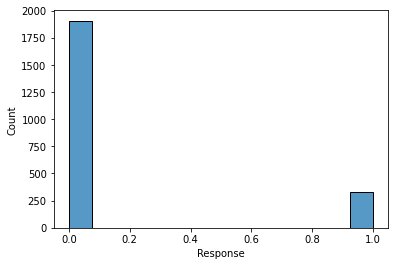

In [ ]:
sns.histplot(data = n_df.Response,palette = 'mako')

The Response feature is severely imbalanced, as we can see above.

Below is a method I wrote to plot the confusion matrix along with other metrics (accuracy, f1 score).

In [ ]:
def print_confMat (y,predictions,graph):
  cm = confusion_matrix(y, predictions)
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  recall_0 = (cm[0,0])/cm[0,:].sum()
  recall_1 = (cm[1,1])/cm[1,:].sum()
  precision_0 = (cm[0,0])/cm[:,0].sum()
  precision_1 = (cm[1,1])/cm[:,1].sum()
  f1_0 = 2*recall_0*precision_0/(recall_0+precision_0)
  f1_1 = 2*recall_1*precision_1/(recall_1+precision_1)
  text = 'Accuracy = '+"{:.2f}".format(accuracy)+'; '+'f1_0 = '+"{:.2f}".format(f1_0)+'; '+'f1_1 = '+"{:.2f}".format(f1_1)+'; '
  if graph:
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.grid(False); ax.set_title(text)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues,ax=ax)
    plt.show()
  else: return accuracy,f1_0,f1_1

Then after, I ran crossvalidation with various n estimators and the criteria as shown below.

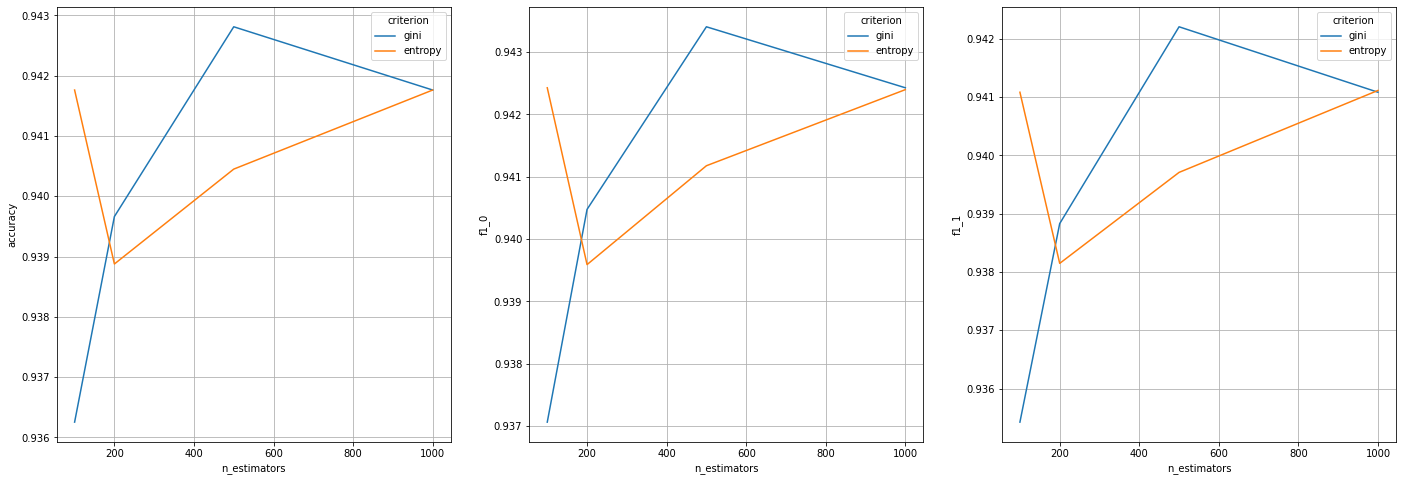

In [ ]:
os = SMOTE(random_state=0, k_neighbors=5)
os_X,os_y =os.fit_resample(lim_df, n_df.Response)

cols=['n_estimators','criterion','accuracy','f1_0','f1_1']
rfc_results = pd.DataFrame(columns=cols)

for n in [100,200,500,1000]:
  for criterion in ['gini','entropy']:
    rfc = RandomForestClassifier(n_estimators=n,criterion=criterion,verbose=0,
                             random_state=1)
    predictions = cross_val_predict(rfc,os_X,os_y.squeeze(),cv=10)
    accuracy, f1_0,f1_1 = print_confMat (os_y, predictions,graph=0)
    rfc_results = rfc_results.append(pd.DataFrame([[n,criterion,accuracy,
                                                      f1_0,f1_1]],columns=cols))
    
rfc_results.reset_index(drop=True,inplace=True)

plt.figure(figsize=(24, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=rfc_results,y='accuracy',x='n_estimators',hue='criterion',ax=ax1)
sns.lineplot(data=rfc_results,y='f1_0',x='n_estimators',hue='criterion',ax=ax2)
sns.lineplot(data=rfc_results,y='f1_1',x='n_estimators',hue='criterion',ax=ax3)

The n estimators=500 and gini criteria yielded the best results.
I was wondering if reducing the amount of OS features might be beneficial. To determine the attributes that were more essential in terms of the Response feature, I used a Random Forest Regression. I chose to make a new dataset with the 14th most essential attributes and do another Random Forest crossvalidation.

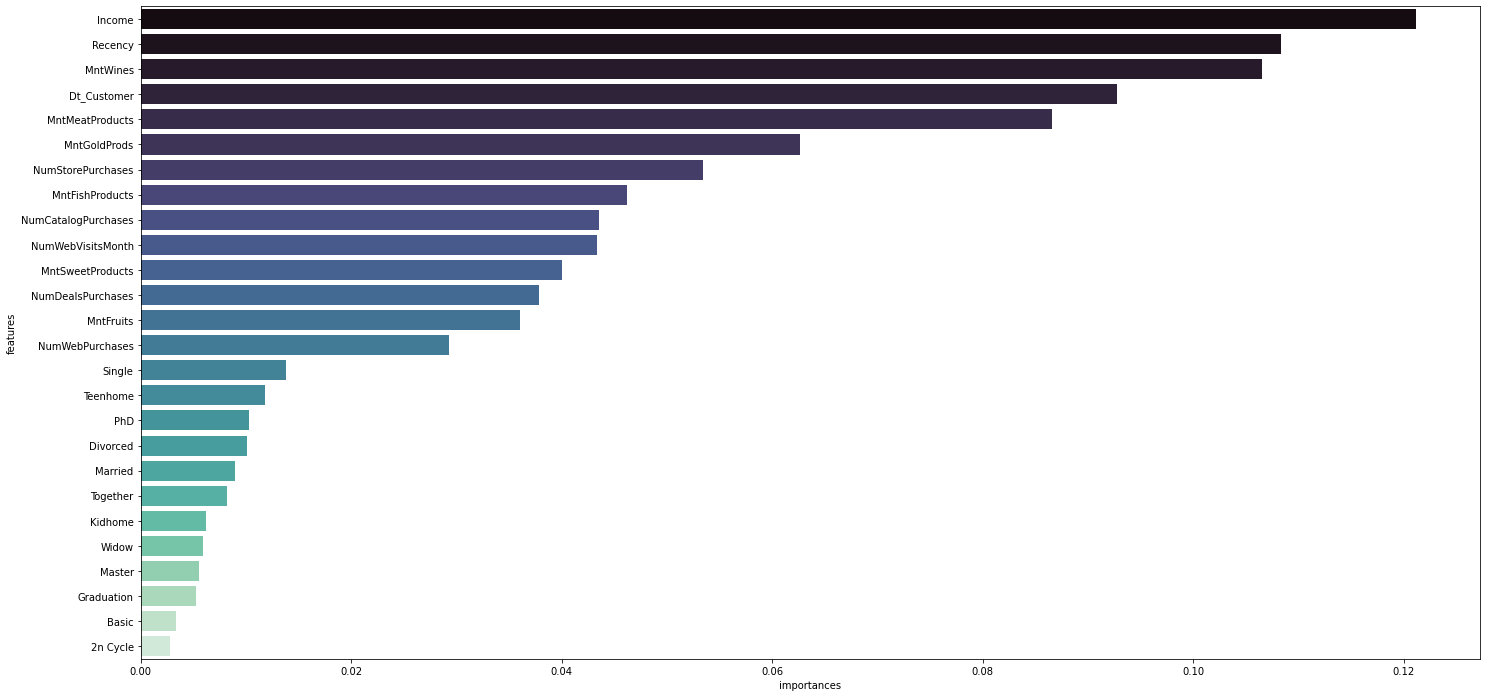

In [ ]:
model = RandomForestRegressor(n_estimators=100,max_depth=50)
model.fit(lim_df,n_df.Response)
features = lim_df.columns
importances = model.feature_importances_
rfc_imp = pd.DataFrame()
rfc_imp['features'] = features;rfc_imp['importances'] = importances
plt.figure(figsize=(24, 12));ax1 = plt.subplot(1,1,1)
sns.barplot(data = rfc_imp.sort_values(by=['importances'],ascending=False), 
            x='importances',y='features',ax=ax1,palette = 'mako')

aux = rfc_imp.sort_values(by=['importances'],ascending=False)
rfc_feats = aux.features[:14].to_list()

rfc_df = lim_df[rfc_feats]

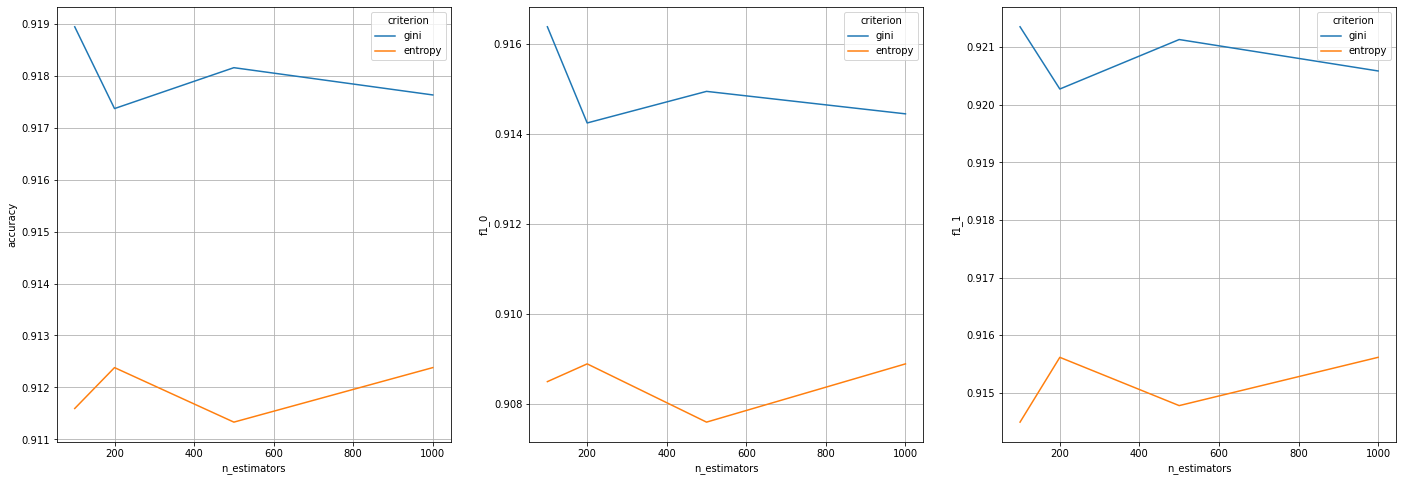

In [ ]:
os = SMOTE(random_state=0, k_neighbors=5)
os_X,os_y =os.fit_resample(rfc_df, n_df.Response)

cols=['n_estimators','criterion','accuracy','f1_0','f1_1']
rfc_results = pd.DataFrame(columns=cols)

for n in [100,200,500,1000]:
  for criterion in ['gini','entropy']:
    rfc = RandomForestClassifier(n_estimators=n,criterion=criterion,verbose=0,
                             random_state=1)
    predictions = cross_val_predict(rfc,os_X,os_y.squeeze(),cv=10)
    accuracy, f1_0,f1_1 = print_confMat (os_y, predictions,graph=0)
    rfc_results = rfc_results.append(pd.DataFrame([[n,criterion,accuracy,
                                                      f1_0,f1_1]],columns=cols))
    
rfc_results.reset_index(drop=True,inplace=True)

plt.figure(figsize=(24, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=rfc_results,y='accuracy',x='n_estimators',hue='criterion',ax=ax1)
sns.lineplot(data=rfc_results,y='f1_0',x='n_estimators',hue='criterion',ax=ax2)
sns.lineplot(data=rfc_results,y='f1_1',x='n_estimators',hue='criterion',ax=ax3)

Unfortunately, the smaller dataset's metrics were worse than the lim df, so I'll utilize the latter.

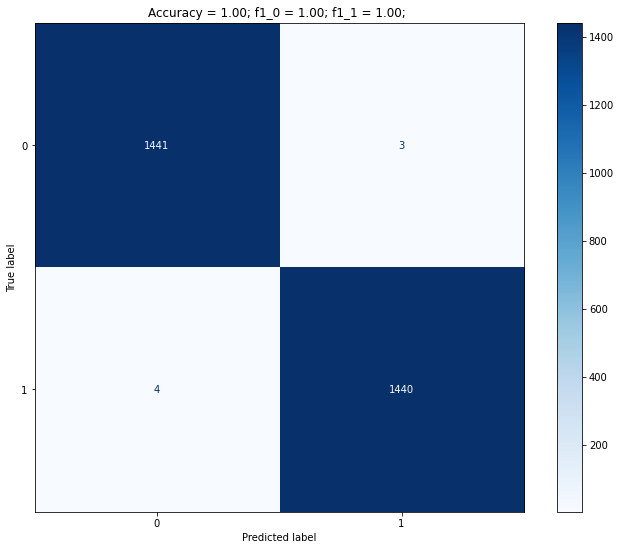

In [ ]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(lim_df, n_df.Response, 
                                                    test_size=0.25, 
                                                    random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
X_train = pd.DataFrame(data=os_data_X,columns=columns )
y_train= pd.DataFrame(data=os_data_y,columns=['Response'])

rfc = RandomForestClassifier(n_estimators=500,criterion='gini',verbose=0,
                             random_state=1)
rfc.fit(os_data_X,os_data_y)
predictions = rfc.predict(os_data_X)
print_confMat (os_data_y,predictions,graph=1)

The prediction for the oversampled train dataset was virtually flawless, as seen in the Confusion matrix graphic above. Let's have a look at the test dataset.

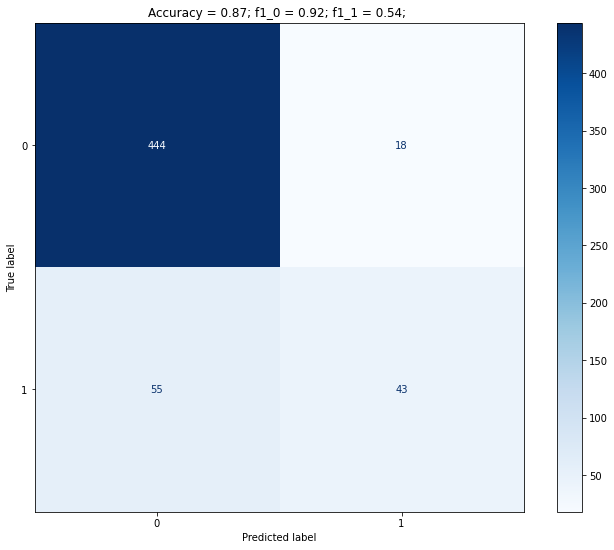

In [ ]:
predictions = rfc.predict(X_test)
print_confMat (y_test,predictions,graph=1)

For the test dataset, the Random Forest showed a good level of accuracy. The most difficult part is precisely predicting Response=1, but I am satisfied with the outcomes. This might be an indication of model overfitting or a result of the SMOTE technique's production of fake samples.

#Neglecting the imbalanced classes

Random Forest is said to be capable of dealing with unbalanced classes on its own. I'll try to train a model with the dataset as is, with no modifications to the samples.

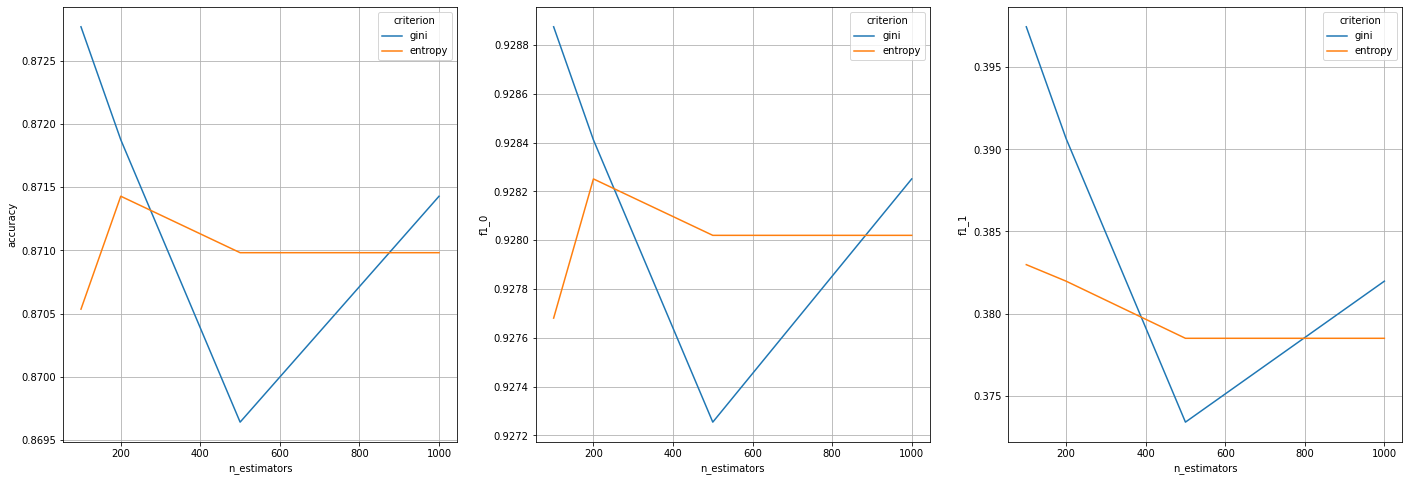

In [ ]:
cols=['n_estimators','criterion','accuracy','f1_0','f1_1']
rfc_results = pd.DataFrame(columns=cols)

for n in [100,200,500,1000]:
  for criterion in ['gini','entropy']:
    rfc = RandomForestClassifier(n_estimators=n,criterion=criterion,verbose=0,
                             random_state=1,max_depth=15)
    predictions = cross_val_predict(rfc,lim_df,n_df.Response,cv=10)
    accuracy, f1_0,f1_1 = print_confMat (n_df.Response, predictions,graph=0)
    rfc_results = rfc_results.append(pd.DataFrame([[n,criterion,accuracy,
                                                      f1_0,f1_1]],columns=cols))
    
rfc_results.reset_index(drop=True,inplace=True)

plt.figure(figsize=(24, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=rfc_results,y='accuracy',x='n_estimators',hue='criterion',ax=ax1)
sns.lineplot(data=rfc_results,y='f1_0',x='n_estimators',hue='criterion',ax=ax2)
sns.lineplot(data=rfc_results,y='f1_1',x='n_estimators',hue='criterion',ax=ax3)

As a result, that did not function. Then I'll try to balance the dataset by using undersampling.
Undersampling with Condensed Nearest Neighbour
The Condensed Nearest Neighbour is a method similar to the KNN. It may be used to undersample a dataset having a skewed distribution of classes. It is minimally consistent because it preserves the cases that a KNN algorithm would not classify in the proper class. Although it appears to be a smart idea, this strategy does not guarantee a perfect balance because it will continue to store values to ensure consistency.




In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

CNN = CondensedNearestNeighbour(random_state=0, n_neighbors=9)

us_X,us_y = CNN.fit_resample(lim_df, n_df.Response)
us_X.shape

(775, 26)

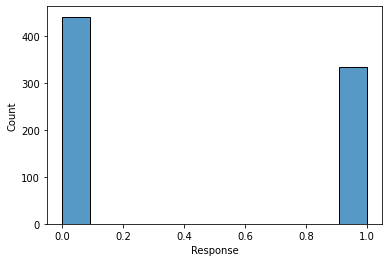

In [ ]:
sns.histplot(data=us_y,palette='mako')

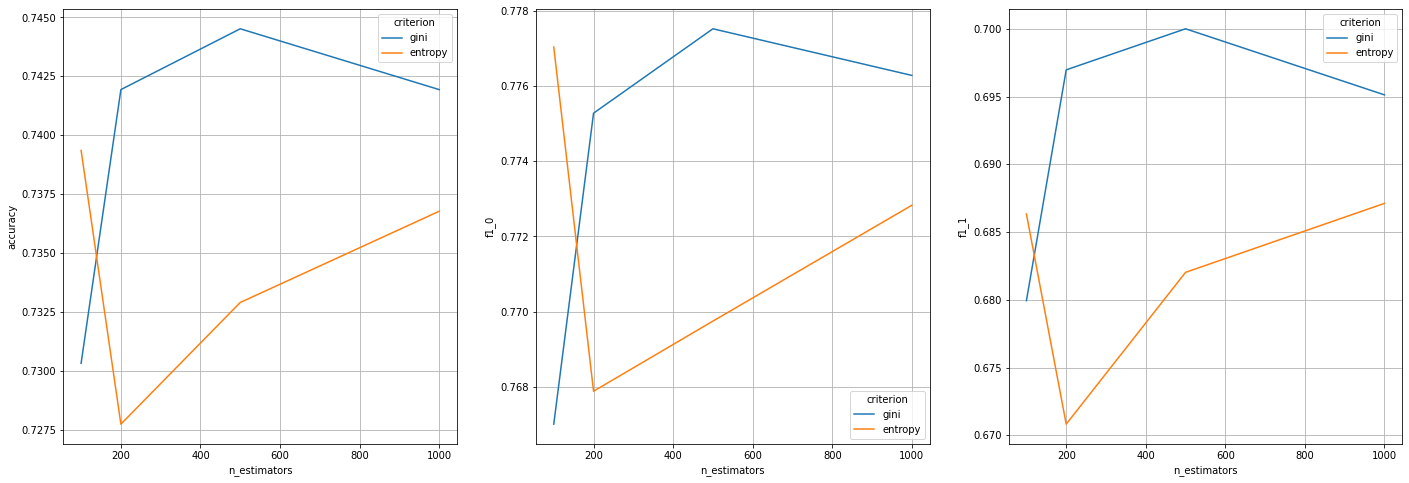

In [ ]:
cols=['n_estimators','criterion','accuracy','f1_0','f1_1']
rfc_results = pd.DataFrame(columns=cols)

for n in [100,200,500,1000]:
  for criterion in ['gini','entropy']:
    rfc = RandomForestClassifier(n_estimators=n,criterion=criterion,verbose=0,
                             random_state=1)
    predictions = cross_val_predict(rfc,us_X,us_y,cv=10)
    accuracy, f1_0,f1_1 = print_confMat (us_y, predictions,graph=0)
    rfc_results = rfc_results.append(pd.DataFrame([[n,criterion,accuracy,
                                                      f1_0,f1_1]],columns=cols))
    
rfc_results.reset_index(drop=True,inplace=True)

plt.figure(figsize=(24, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=rfc_results,y='accuracy',x='n_estimators',hue='criterion',ax=ax1)
sns.lineplot(data=rfc_results,y='f1_0',x='n_estimators',hue='criterion',ax=ax2)
sns.lineplot(data=rfc_results,y='f1_1',x='n_estimators',hue='criterion',ax=ax3)

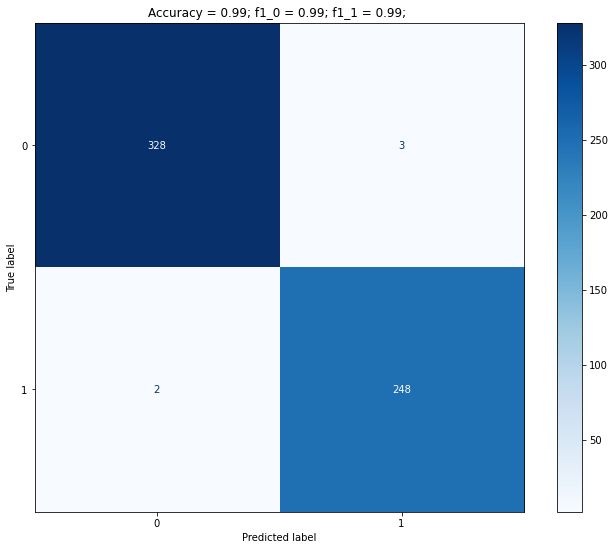

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(us_X, us_y,test_size=0.25, random_state=0)
# columns = X_train.columns
# os_data_X,os_data_y=os.fit_resample(X_train, y_train)
# X_train = pd.DataFrame(data=os_data_X,columns=columns )
# y_train= pd.DataFrame(data=os_data_y,columns=['Response'])

rfc = RandomForestClassifier(n_estimators=1000,criterion='gini',verbose=0,
                             random_state=1)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_train)
print_confMat (y_train,predictions,graph=1)

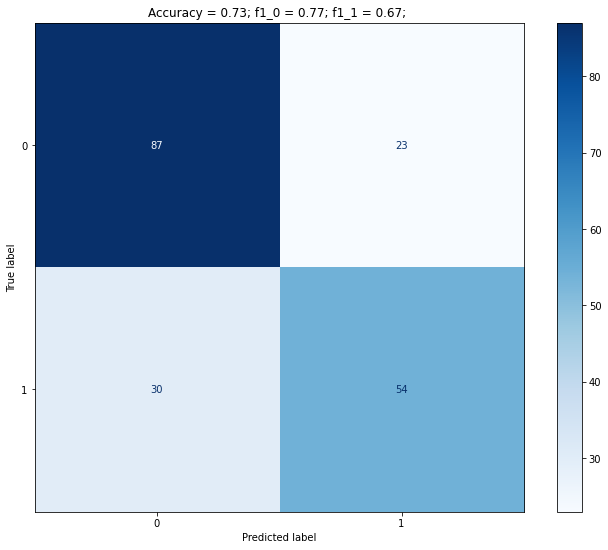

In [ ]:
predictions = rfc.predict(X_test)
print_confMat (y_test,predictions,graph=1)

# Using KNN CLassification

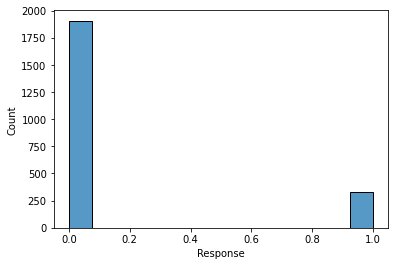

In [ ]:
sns.histplot(data = n_df.Response,palette = 'mako')

In [ ]:
os = SMOTE(random_state=0, k_neighbors=5)
#os = ADASYN(random_state=0,n_neighbors=5)
os_X,os_y =os.fit_resample(lim_df, n_df.Response)

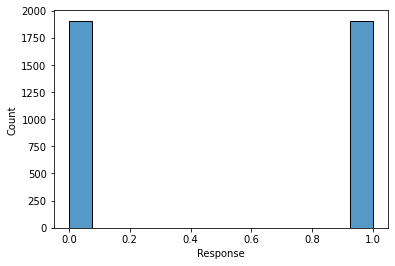

In [ ]:
sns.histplot(data = os_y,palette = 'mako')

#Crossvalidation to define the best hyperparameters

In [ ]:
def appKNN(n_neighbors,weights,X,y):
  pipeKNN = make_pipeline(StandardScaler(), 
                          KNeighborsClassifier(n_neighbors=n_neighbors,
                                               weights=weights)) 

  predictions = cross_val_predict(pipeKNN,X,y.squeeze(),cv=10)
  cm = confusion_matrix(y, predictions)
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  recall_0 = (cm[0,0])/cm[0,:].sum()
  recall_1 = (cm[1,1])/cm[1,:].sum()
  precision_0 = (cm[0,0])/cm[:,0].sum()
  precision_1 = (cm[1,1])/cm[:,1].sum()
  f1_0 = 2*recall_0*precision_0/(recall_0+precision_0)
  f1_1 = 2*recall_1*precision_1/(recall_1+precision_1)
  return accuracy, f1_0,f1_1

The above function is run with different hyperparameters to observe how they affected the stats.

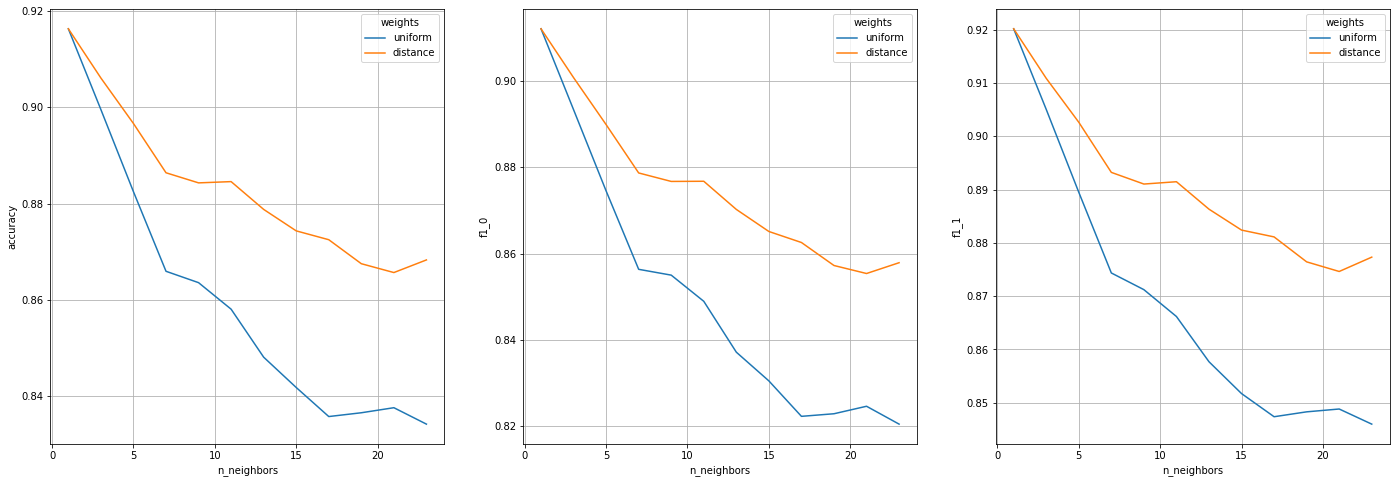

In [ ]:
cols=['n_neighbors','weights','accuracy','f1_0','f1_1']
KNN_results = pd.DataFrame(columns=cols)
for n_neighbors in [1,3,5,7,9,11,13,15,17,19,21,23]:
  for weights in ['uniform','distance']:
      accuracy, f1_0,f1_1 = appKNN(n_neighbors,weights,os_X,os_y)
      KNN_results = KNN_results.append(pd.DataFrame([[n_neighbors,weights,accuracy,
                                                      f1_0,f1_1]],columns=cols))
      
KNN_results.reset_index(drop=True,inplace=True)

#fig, ax = plt.subplots(figsize=(12, 9))
plt.figure(figsize=(24, 8));ax1 = plt.subplot(1,3,1);ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True);ax2.grid(True);ax3.grid(True)
sns.lineplot(data=KNN_results,y='accuracy',x='n_neighbors',hue='weights',ax=ax1)
sns.lineplot(data=KNN_results,y='f1_0',x='n_neighbors',hue='weights',ax=ax2)
sns.lineplot(data=KNN_results,y='f1_1',x='n_neighbors',hue='weights',ax=ax3)

When we increase the number of neighbors considered for categorization, it appears that all of the quality indicators decline. With n neighbors=1, the best metric is found, which does not seem like a good idea.

The 'distance' is without a doubt the best weight.

In [ ]:
def print_confMat (y,predictions):
  cm = confusion_matrix(y, predictions)
  accuracy = (cm[0,0]+cm[1,1])/cm.sum()
  recall_0 = (cm[0,0])/cm[0,:].sum()
  recall_1 = (cm[1,1])/cm[1,:].sum()
  precision_0 = (cm[0,0])/cm[:,0].sum()
  precision_1 = (cm[1,1])/cm[:,1].sum()
  f1_0 = 2*recall_0*precision_0/(recall_0+precision_0)
  f1_1 = 2*recall_1*precision_1/(recall_1+precision_1)
  text = 'Accuracy = '+"{:.2f}".format(accuracy)+'; '+'f1_0 = '+"{:.2f}".format(f1_0)+'; '+'f1_1 = '+"{:.2f}".format(f1_1)+'; '
  fig, ax = plt.subplots(figsize=(12, 9))
  ax.grid(False); ax.set_title(text)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap=plt.cm.Blues,ax=ax)
  plt.show()

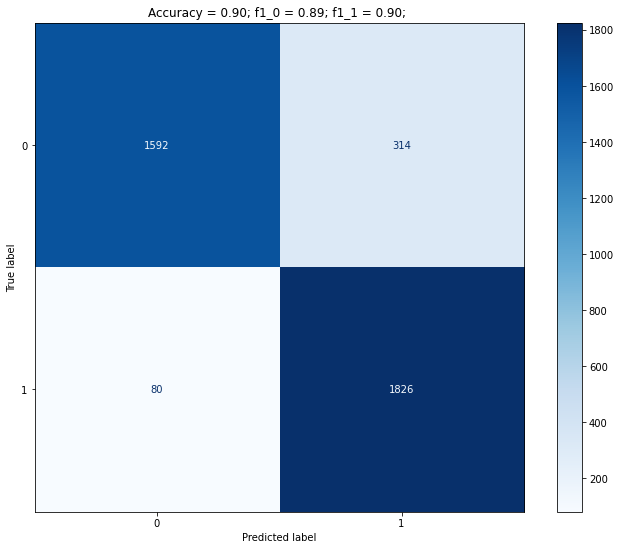

In [ ]:
pipeKNN = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=5,
                                               weights='distance') ) 

predictions = cross_val_predict(pipeKNN,os_X,os_y.squeeze(),cv=10)

print_confMat (os_y, predictions)

Cross validation yielded extremely high metrics, leading us to anticipate that the predictions would be quite accurate. Because the crossvalidation functions, in my opinion, do not produce a model, I used a hold out in the next paragraph.

In [ ]:
#KNN with hold out

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(lim_df, n_df.Response, 
                                                    test_size=0.2, 
                                                    random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
X_train = pd.DataFrame(data=os_data_X,columns=columns )
y_train= pd.DataFrame(data=os_data_y,columns=['Response'])

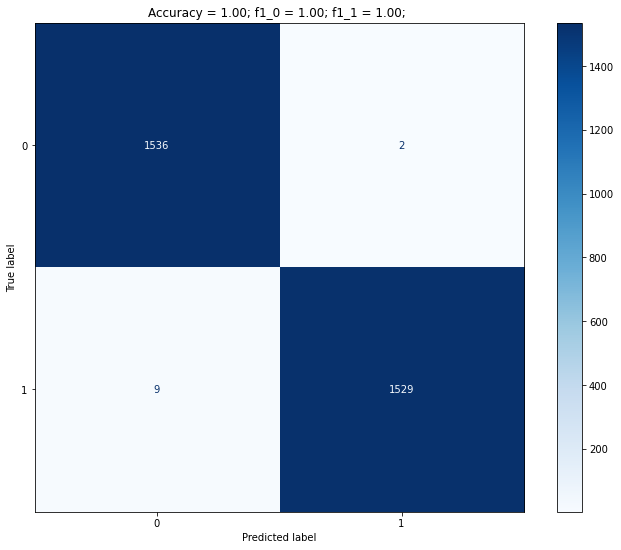

In [ ]:
pipeKNN.fit(X_train, y_train.squeeze())
predictions = pipeKNN.predict(X_train)
print_confMat (y_train, predictions)

When it comes to predicting the training dataset, the confusion matrix and metrics perform admirably. SMOTE was used to balance the training dataset. This is hoped to continue when we attempt to forecast the test dataset.

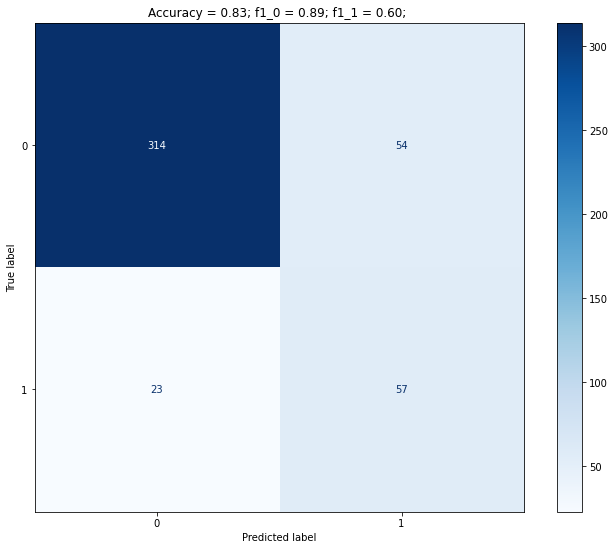

In [ ]:
predictions = pipeKNN.predict(X_test)
print_confMat (y_test, predictions)

When the model is applied to the test dataset and the confusion matrix is shown, we can see that Response=0 is extremely well predicted, but Response=1 is not. This might be an indication of model overfitting or a result of the SMOTE technique's production of fake samples.

# Did any of the techniques increasr your accuracy.